In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
de=pd.read_csv(r'D:\python_code\50_Startups.csv')
de.info()



de


# plt.scatter(de['RDSpend'],de['Profit'])
# plt.xlabel('RDSpend')
# plt.ylabel('Profit')
# plt.show()


# plt.scatter(de['Administration'],de['Profit'])
# plt.xlabel('Administration')
# plt.ylabel('Profit')
# plt.show()


# plt.scatter(de['MarketingSpend'],de['Profit'])
# plt.xlabel('MarketingSpend')
# plt.ylabel('Profit')
# plt.show()


de.corr()


de['State'].value_counts()


de.isna().sum()


# rd_withoutna=de['RDSpend'].dropna()      #here we have to na in our column so we have to drop it
# plt.boxplot(rd_withoutna,vert=False);


# plt.boxplot(de['Administration'],vert=False);


de['RDSpend'].fillna(value=de['RDSpend'].mean(),inplace=True)
de["MarketingSpend"].fillna(value=de['MarketingSpend'].mean(),inplace=True)


#split data into X and y

X=de.iloc[:,[0,2]].values
y=de.iloc[:,-1].values
print(X.shape,y.shape)





#Spliting data into training and testing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)   #random_state seed random number 


print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)



model=LinearRegression()
model.fit(X_train,y_train)

model.coef_

model.intercept_


#r2 score approxaccuracy
#r2 score explain variation in data
y_pred=model.predict(X_test)


from sklearn.metrics import r2_score


r2_score(y_test,y_pred)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_120488\1924804203.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  de.corr()


(50, 2) (50,)
(40, 2) (10, 2) (40,) (10,)


0.9033755169989443

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
vif=pd.DataFrame()
origXColumns=de.iloc[:,:-2]
origXColumns.values

array([[165349.2       , 136897.8       , 471784.1       ],
       [162597.7       , 151377.59      , 443898.53      ],
       [153441.51      , 101145.55      , 407934.54      ],
       [144372.41      , 118671.85      , 383199.62      ],
       [142107.34      ,  91391.77      , 366168.42      ],
       [131876.9       ,  99814.71      , 362861.36      ],
       [134615.46      , 147198.87      , 127716.82      ],
       [130298.13      , 145530.06      , 323876.68      ],
       [120542.52      , 148718.95      , 311613.29      ],
       [123334.88      , 108679.17      , 304981.62      ],
       [101913.08      , 110594.11      , 229160.95      ],
       [100671.96      ,  91790.61      , 249744.55      ],
       [ 93863.75      , 127320.38      , 249839.44      ],
       [ 91992.39      , 135495.07      , 252664.93      ],
       [119943.24      , 156547.42      , 256512.92      ],
       [114523.61      , 122616.84      , 261776.23      ],
       [ 78013.11      , 121597.55      

In [5]:
origXColumns.shape

(50, 3)

In [6]:
vif['VIF Factor']=[variance_inflation_factor(origXColumns.values,i)for i in range(origXColumns.shape[1])]
vif['features']=origXColumns.columns
vif.round(1)

,VIF Factor,features
0,8.5,RDSpend
1,4.9,Administration
2,7.9,MarketingSpend


In [7]:
variance_inflation_factor(origXColumns.values,0)

8.486857957496964

#### Pickel Dump and Load

In [8]:
import pickle

In [9]:
c='some string'
d={'a':1,'b':2}
e=[1,2,3]
f=(10,20)

In [10]:
f1=open('test.bin','wb')
pickle.dump(c,f1)
pickle.dump(d,f1)
pickle.dump(e,f1)
pickle.dump(f,f1)
f1.close()

In [11]:
f1=open('test.bin','rb')

In [12]:
pickle.load(f1)

'some string'

In [13]:
f1.close()

In [14]:
try:
    f1=open('test.bin','rb')
    while True:
        print(pickle.load(f1))
except:
    f1.close()
    

some string
{'a': 1, 'b': 2}
[1, 2, 3]
(10, 20)


In [15]:
import pickle
import numpy as np
f1=open('test1.bin','rb')
pickle.load(f1)

LinearRegression()

In [16]:
salmodel=pickle.load(f1)

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
de=pd.read_csv(r'D:\python_code\50_Startups.csv')
#de.info()

de.corr()

de['State'].value_counts()

de['RDSpend'].fillna(value=de['RDSpend'].mean(),inplace=True)
de["MarketingSpend"].fillna(value=de['MarketingSpend'].mean(),inplace=True)


#split data into X and y

X=de.iloc[:,[0,1,2,3]].values
y=de.iloc[:,-1].values
print(X.shape,y.shape)


from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
X[:,3]=le.fit_transform(X[:,3])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ct=ColumnTransformer([('ohe',OneHotEncoder(categories='auto'),[3])],remainder='passthrough')
ct


X=ct.fit_transform(X)
X


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


(50, 4) (50,)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_120488\3345581425.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  de.corr()


### Lasso Regression

In [18]:
from sklearn.linear_model import LassoCV

In [19]:
model=LassoCV()
model.fit(X,y).score(X,y)

0.7970081704680899

In [20]:
model.coef_

array([-0.        ,  0.        ,  0.        ,  0.69424795,  0.01606084,
        0.07192959])

In [21]:
imp_coef=pd.Series(model.coef_,index=['cal','fl','ny','RD','AD','MEXP'])

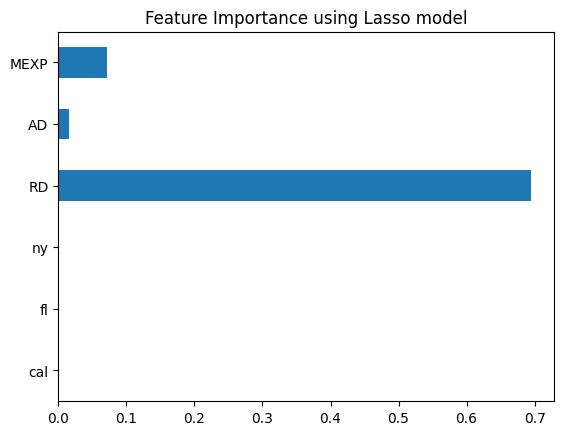

In [22]:
imp_coef.plot(kind='barh')
plt.title("Feature Importance using Lasso model")
plt.show()

### Ridge Regression

In [23]:
from sklearn.linear_model import RidgeCV
model=RidgeCV()
model.fit(X,y).score(X,y)

0.8014231314961437

### ElasticNet Regerssion

In [24]:
from sklearn.linear_model import ElasticNetCV
model=ElasticNetCV()
model.fit(X,y).score(X,y)

0.7970028350244669

### Logistic Regression

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [27]:
inp=np.arange(-10,10)
ans=[(sigmoid(i))for i in inp]

([<matplotlib.lines.Line2D at 0x18593fa4b90>],)

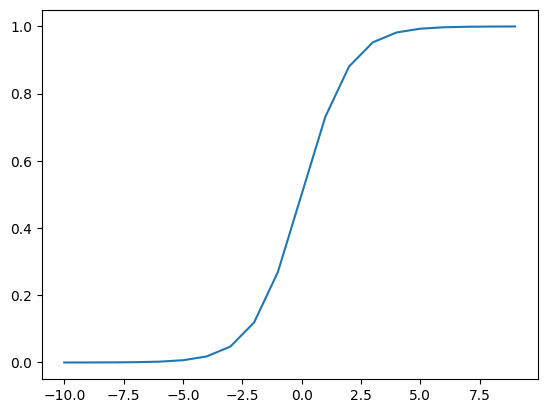

In [28]:
plt.plot(inp,ans),

In [29]:
pd.read_clipboard()

EmptyDataError: No columns to parse from file

In [33]:
df=pd.read_excel(r"C:\Users\ADMIN\Downloads\Social_Network_Ads.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [34]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [35]:
df.corr()

,Age,Salary,Purchased
Age,1.000000,0.098741,0.566638
Salary,0.098741,1.000000,0.340323
Purchased,0.566638,0.340323,1.000000


In [36]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


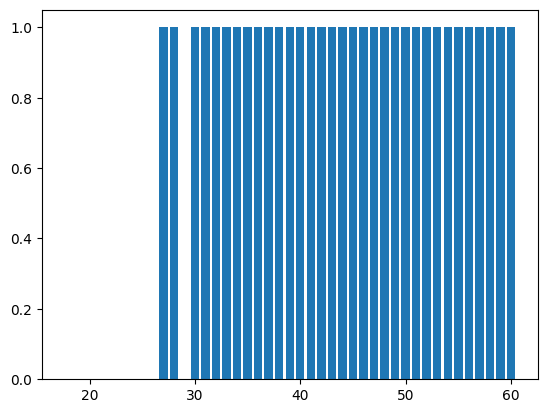

In [37]:
#are all features at the standard scale if not then we have to do some type os scaling

plt.bar(df['Age'],df['Purchased'])                    #there is no point of making bar chart
plt.show()

(array([ 9., 12., 25., 38., 60., 39., 52., 24.]),
 array([16., 21., 26., 31., 36., 41., 46., 51., 56.]),
 <BarContainer object of 8 artists>)

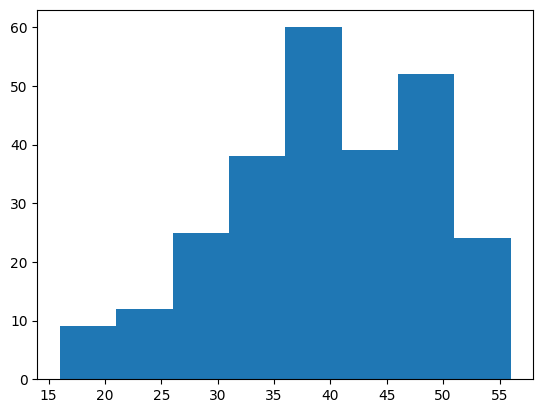

In [38]:
plt.hist(df['Age'],bins=np.arange(16,61,5))

In [39]:
df['Purchased'].value_counts()

0    142
1    142
Name: Purchased, dtype: int64

In [40]:
#create a not purchased mask

np_mask=df['Purchased']==0
df_np=df[np_mask]
df_np

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
4,27,57000,0
5,19,76000,0
...,...,...,...
261,42,53000,0
264,42,64000,0
271,39,71000,0
278,39,59000,0


In [41]:
#create a purchased mask

p_mask=df['Purchased']==1
df_p=df[p_mask]

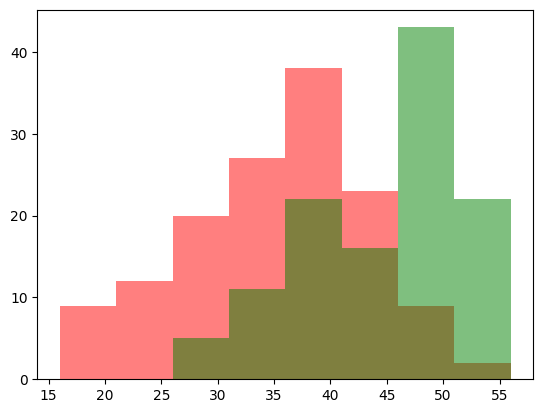

In [42]:
plt.hist(df_np['Age'],bins=np.arange(16,61,5),color='r',alpha=0.5);
plt.hist(df_p['Age'],bins=np.arange(16,61,5),color='g',alpha=0.5);

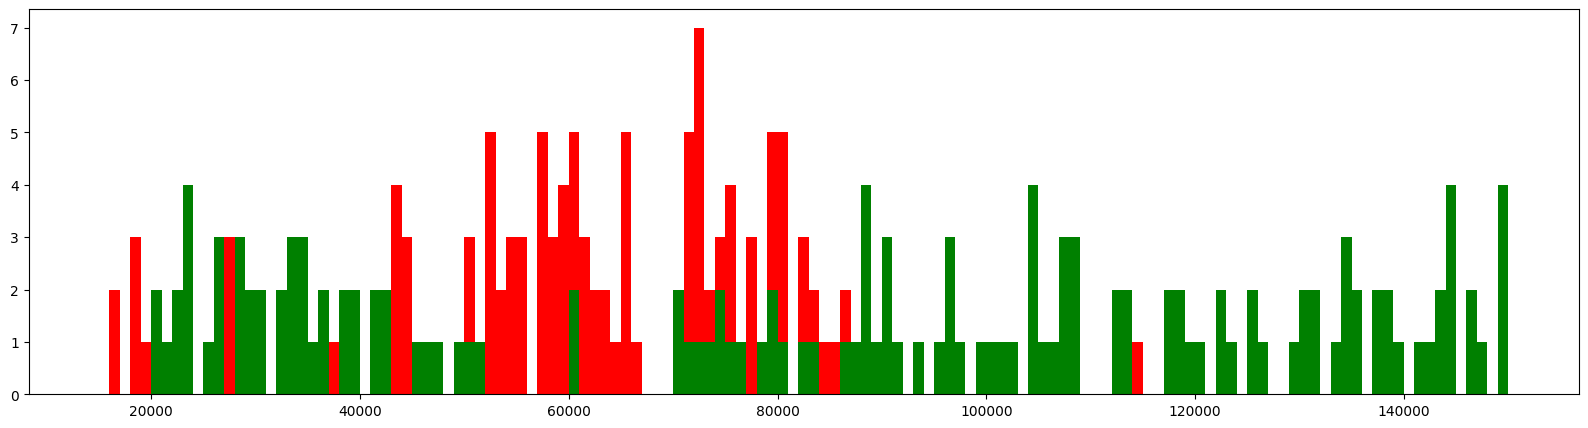

In [43]:
plt.figure(figsize=(20,5))
plt.hist(df_np['Salary'],bins=np.arange(15000,151000,1000),color='r');
plt.hist(df_p['Salary'],bins=np.arange(15000,151000,1000),color='g');

### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X=df.iloc[:,[0,1]].values
y=df.iloc[:,-1].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    47,  25000],
       [    27,  57000],
       [    19,  76000],
       [    48,  29000],
       [    45,  22000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    45,  26000],
       [    46,  28000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],


In [46]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [47]:
X_sc[:5]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [48]:
m=df['Age'].mean()

In [49]:
std=df['Age'].std()

In [50]:
(19-m)/std

-2.132716751159855

### MinMax Scaler (Customised Scaling)

In [51]:
from sklearn.preprocessing import MinMaxScaler

mm_scalar = MinMaxScaler()
X_mm = mm_scalar.fit_transform(X)

X_mm[:5]

array([[0.02380952, 0.02238806],
       [0.4047619 , 0.02985075],
       [0.19047619, 0.20149254],
       [0.69047619, 0.06716418],
       [0.21428571, 0.30597015]])

#### Day 6


In [52]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [53]:
mm_scaler=MinMaxScaler()
X_mm=mm_scaler.fit_transform(X)

In [54]:
X_mm

array([[0.02380952, 0.02238806],
       [0.4047619 , 0.02985075],
       [0.19047619, 0.20149254],
       [0.69047619, 0.06716418],
       [0.21428571, 0.30597015],
       [0.02380952, 0.44776119],
       [0.71428571, 0.09701493],
       [0.64285714, 0.04477612],
       [0.21428571, 0.31343284],
       [0.21428571, 0.50746269],
       [0.33333333, 1.        ],
       [0.16666667, 0.12686567],
       [0.4047619 , 0.36567164],
       [0.19047619, 0.47761194],
       [0.19047619, 0.26865672],
       [0.04761905, 0.52238806],
       [0.33333333, 0.01492537],
       [0.        , 0.49253731],
       [0.26190476, 0.47761194],
       [0.64285714, 0.07462687],
       [0.66666667, 0.08955224],
       [0.69047619, 0.24626866],
       [0.71428571, 0.18656716],
       [0.64285714, 0.04477612],
       [0.66666667, 0.05223881],
       [0.69047619, 0.02985075],
       [0.73809524, 0.08955224],
       [0.69047619, 0.10447761],
       [0.26190476, 0.20149254],
       [0.30952381, 0.01492537],
       [0.

In [55]:
#max salary=150000 and min salary=16000

In [56]:
(19000-16000)/(150000-16000)

0.022388059701492536

In [57]:
#in image we go for min max scaler 

#### Split data into training and testing

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train).score(X_test,y_test)

0.8070175438596491

### Binary Classification 

#### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[19  5]
 [ 6 27]]


In [63]:
# (19+27)/57

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.84      0.82      0.83        33

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [65]:
y_pred_prob=model.predict_proba(X_test)

In [66]:
y_pred_prob.shape

(57, 2)

In [67]:
y_pred_prob

array([[0.34520688, 0.65479312],
       [0.76663593, 0.23336407],
       [0.01510925, 0.98489075],
       [0.40211022, 0.59788978],
       [0.27214151, 0.72785849],
       [0.06820204, 0.93179796],
       [0.08288601, 0.91711399],
       [0.42436129, 0.57563871],
       [0.96477962, 0.03522038],
       [0.4238051 , 0.5761949 ],
       [0.98688309, 0.01311691],
       [0.07590403, 0.92409597],
       [0.78252438, 0.21747562],
       [0.74001607, 0.25998393],
       [0.6903589 , 0.3096411 ],
       [0.18937519, 0.81062481],
       [0.47518724, 0.52481276],
       [0.61276453, 0.38723547],
       [0.96867895, 0.03132105],
       [0.1870556 , 0.8129444 ],
       [0.10478907, 0.89521093],
       [0.03390628, 0.96609372],
       [0.67939258, 0.32060742],
       [0.5979055 , 0.4020945 ],
       [0.01747578, 0.98252422],
       [0.52520766, 0.47479234],
       [0.42361975, 0.57638025],
       [0.63939173, 0.36060827],
       [0.02016034, 0.97983966],
       [0.0707024 , 0.9292976 ],
       [0.

In [68]:
list(map(len,["abc","defg"]))

[3, 4]

In [69]:
y_pred_from_prob=list(map(lambda c:1 if c>0.5 else 0,y_pred_prob[:,1]))
y_pred_from_prob

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0]

In [70]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [71]:
confusion_matrix(y_test,y_pred_from_prob)

array([[19,  5],
       [ 6, 27]], dtype=int64)

#### changing the threshhold

In [72]:
y_pred_from_prob=list(map(lambda c:1 if c>0.4 else 0,y_pred_prob[:,1]))
y_pred_from_prob

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1]

In [73]:
confusion_matrix(y_test,y_pred_from_prob)

array([[15,  9],
       [ 4, 29]], dtype=int64)

#### here we have made false negetive 0 because false negetive is very dangerous

In [74]:
y_pred_from_prob=list(map(lambda c:1 if c>0.3 else 0,y_pred_prob[:,1]))
y_pred_from_prob

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1]

In [75]:
confusion_matrix(y_test,y_pred_from_prob)

array([[12, 12],
       [ 0, 33]], dtype=int64)

In [76]:
#Age = 25, salary= 150000 has this person purchased

In [77]:
new_vals=np.array([[25,150000]])
new_vals

array([[    25, 150000]])

#### Any preprocessing done on X column before training the model same should be applied when using predict funtion

In [78]:
model.predict(sc.transform(new_vals))     # we have to do scaling here
                        

array([0], dtype=int64)

In [79]:
model.predict_proba(sc.transform(new_vals))

array([[0.6302464, 0.3697536]])

### Plot confusion Matrix

In [80]:
from sklearn.metrics import plot_confusion_matrix

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


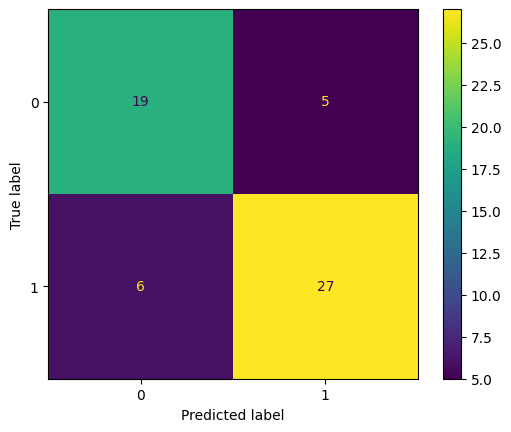

In [81]:
plot_confusion_matrix(model,X_test,y_test);

### Anova

In [82]:
from scipy.stats import f_oneway

In [86]:
l1=np.arange(11,21)
l2=np.arange(10,20)
f_oneway(l1,l2)

F_onewayResult(statistic=0.5454545454545455, pvalue=0.4697020728007999)

In [84]:
Purchased_Age=df[df['Purchased']==1['Age']]
NPurchased_Age=df[df['Purchased']==0['Age']]

<>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_120488\3343287283.py:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  Purchased_Age=df[df['Purchased']==1['Age']]


TypeError: 'int' object is not subscriptable

In [87]:
from scipy.stats import chi2_contingency

In [88]:
#define the table
#cross tabulate the categorical variables
#example Gender cross tabulate Smoker and Non smoker

data=[[48,20],[19,100]]
stat,p,dof,expected=chi2_contingency(data)

#interpret p-value
alpha=0.05
print('p value is '+str(p))
if p<=alpha:
    print("dependent(reject H0)")
else:
    print("column are not corelated/independent(h0 holds true)")

p value is 2.2168145773084614e-13
dependent(reject H0)
